<a href="https://colab.research.google.com/github/katemezger/Divinity_FirstYearSales_Prediction/blob/main/data_cleaning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd

# Loading the data set into the progrma
df = pd.read_csv('rpg_steam_clean.csv')

# manually imputting the bg3 data

bg3_data = {
    'steam_id_number': [1086940],
    'game_title': ["Baldur's Gate 3"],
    'release_month': ['August'],
    'release_year': [2023],
    'release_price': [59.99],
    'lowest_estimated_owners_number': ['15,000,000'],
    'highest_estimated_owners_number': ['25,000,000'],
    'average_estimated_owners_number': ['20,000,000'],
    'developer': ['Larian Studios'],
    'publisher': ['Larian Studios']
}

# dataframe for bg3
bg3_df = pd.DataFrame(bg3_data)

# combining the two dataframes
df_updated = pd.concat([df, bg3_df], ignore_index=True)

# new file
df_updated.to_csv('rpg_steam_with_bg3.csv', index=False)

# checking to ensure it is working
print(df_updated.tail(1))

       steam_id_number       game_title release_month  release_year  \
10477          1086940  Baldur's Gate 3        August          2023   

       release_price lowest_estimated_owners_number  \
10477          59.99                     15,000,000   

      highest_estimated_owners_number average_estimated_owners_number  \
10477                      25,000,000                      20,000,000   

            developer       publisher  
10477  Larian Studios  Larian Studios  


Now that we have created the full data set including Baldur's Gate 3 we now will calculate estimated revenue

In [5]:
import pandas as pd

# loading the numeric file
df = pd.read_csv('rpg_data_numeric.csv')

# estimated revenue dataframe
df['estimated_revenue'] = df['average_estimated_owners_number'] * df['release_price']

# saving file
df.to_csv('rpg_data_final.csv', index = False)

print("Created 'rpg_data_final.csv' with revenue data!")

print(df[df['developer'] == 'Larian Studios'][['game_title', 'estimated_revenue']])

Created 'rpg_data_final.csv' with revenue data!
                                          game_title  estimated_revenue
4          Divinity: Original Sin - Enhanced Edition       5.998500e+07
9      Divinity: Original Sin 2 - Definitive Edition       3.374250e+08
46                  Divinity: Original Sin (Classic)       5.998500e+07
174                                  Divine Divinity       4.492500e+06
470                                  Beyond Divinity       2.096500e+06
2389                      Divinity: Dragon Commander       1.399650e+07
2567                    Divinity II: Developer's Cut       1.499250e+07
2769                                 Baldur's Gate 3       2.099650e+08
10477                                Baldur's Gate 3       1.199800e+09


Now that we have the estimated revenue we will now calculate some marketing insights for the product

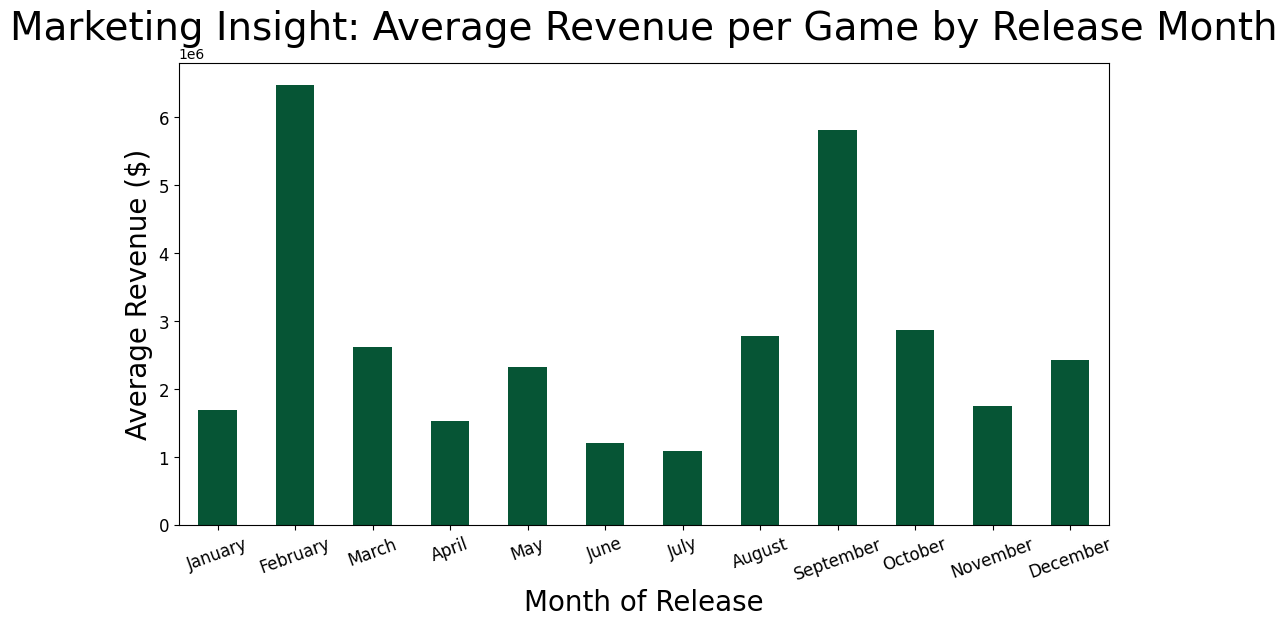

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams["font.serif"] = ["Times New Roman"]

# loading the dataset we made in the last code block
df = pd.read_csv('rpg_data_final.csv')

month_order = [
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'
]

# calculating avg monthly rev.
monthly_analysis = df.groupby('release_month')['estimated_revenue'].mean().reindex(month_order)

# bar chart plot
# honestly not really needed but makes it easy to look at
plt.figure(figsize=(12, 6))
monthly_analysis.plot(kind='bar', color = '#065535')
plt.title('Marketing Insight: Average Revenue per Game by Release Month', fontsize=28)
plt.ylabel('Average Revenue ($)', fontsize = 20)
plt.xlabel('Month of Release', fontsize = 20)
plt.xticks(rotation = 20, fontsize = 12)
plt.yticks(fontsize = 12)

plt.show()